# **SpaceX  Falcon 9 First Stage Landing Prediction**


# 3. Data Wrangling and Exploratory Data Analysis
*   Exploratory Data Analysis
*   Determine Training Labels

## 3.1. Import Libraries


In [2]:
import pandas as pd
import numpy as np

## 3.2. Data Wrangling


Data extracted from SpaceX REST API are used for the rest of this project due to much more information about landing compared to launch records from Wikipedia page.


In [17]:
# read in the data generated in step 1 from SpaceX REST API
df=pd.read_csv('dataset_1.csv')
df.head(10)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
1,2,2012-05-22,Falcon 9,525.0,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857
2,3,2013-03-01,Falcon 9,677.0,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857
3,4,2013-09-29,Falcon 9,500.0,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093
4,5,2013-12-03,Falcon 9,3170.0,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857
5,6,2014-01-06,Falcon 9,3325.0,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1005,-80.577366,28.561857
6,7,2014-04-18,Falcon 9,2296.0,ISS,CCSFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1006,-80.577366,28.561857
7,8,2014-07-14,Falcon 9,1316.0,LEO,CCSFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1007,-80.577366,28.561857
8,9,2014-08-05,Falcon 9,4535.0,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1008,-80.577366,28.561857
9,10,2014-09-07,Falcon 9,4428.0,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1011,-80.577366,28.561857


In [21]:
df.shape

(149, 17)

In [22]:
# check data types
df.dtypes

FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
dtype: object

In [25]:
# check what values there are for 'Orbit'
df['Orbit'].value_counts()

VLEO     42
GTO      31
ISS      30
LEO      13
PO       13
SSO      10
MEO       4
ES-L1     1
HEO       1
SO        1
GEO       1
TLI       1
Name: Orbit, dtype: int64

* `TLI`: Trans-lunar injection, ~67-200km km altitudes
* `VLEO`: Very Low Earth Orbit, 250-450 km altitudes
* `ISS`: International Space Station, 400 km altitudes
* `PO`: Polar Orbit, 200-1,000 km altitudes
* `SSO`, `SO`: Sun-synchronous Orbit, 200-1,000 km altitudes
* `LEO`: Low Earth Orbit, 160-2,000 km altitudes
* `MEO`: Medium Earth Orbit, 2,000-35,786 km altitudes
* `GEO`: Geosynchronous Orbit, exact 35,786 km altitude
* `GTO`: Geosynchronous Transfer Orbit, ~37,000 km altitudes
* `HEO`: High Earth Orbit, >35,786 km altitudes
* `ES-L1`: Earth Sun Lagrangian Point 1, ~1,500,000 km altitude

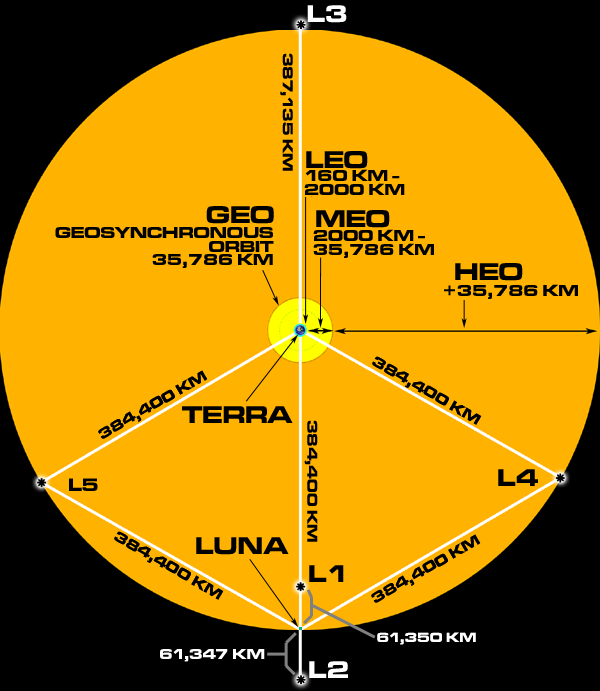

In [27]:
# check what values there are for 'LaunchSite'
df['LaunchSite'].value_counts()

CCSFS SLC 40    83
KSC LC 39A      45
VAFB SLC 4E     21
Name: LaunchSite, dtype: int64

* `CCSFS SLC 40`: Cape Canaveral Space Launch Complex 40, FL US
* `KSC LC 39A`: Kennedy Space Center Launch Complex 39A, FL US
* `VAFB SLC 4E`: Vandenberg Space Launch Complex 4, CA US

In [28]:
# check what values there are for 'Outcome'
df['Outcome'].value_counts()

True ASDS      91
True RTLS      22
None None      19
False ASDS      7
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: Outcome, dtype: int64

* <code>True Ocean</code> means the mission outcome was successfully  landed to a specific region of the ocean.
* <code>False Ocean</code> means the mission outcome was unsuccessfully landed to a specific region of the ocean. 
* <code>True RTLS</code> means the mission outcome was successfully  landed to a ground pad.
* <code>False RTLS</code> means the mission outcome was unsuccessfully landed to a ground pad.
* <code>True ASDS</code> means the mission outcome was successfully landed on  a drone ship.
* <code>False ASDS</code> means the mission outcome was unsuccessfully landed on a drone ship.
<code>None ASDS</code> and <code>None None</code> these represent a failure to land.

In [31]:
# calculate numbers of missing values
df.isnull().sum()

FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass       20
Orbit              1
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
dtype: int64

In [32]:
# calculate the percentage of missing values
df.isnull().sum()/df.shape[0]*100

FlightNumber       0.000000
Date               0.000000
BoosterVersion     0.000000
PayloadMass       13.422819
Orbit              0.671141
LaunchSite         0.000000
Outcome            0.000000
Flights            0.000000
GridFins           0.000000
Reused             0.000000
Legs               0.000000
LandingPad        17.449664
Block              0.000000
ReusedCount        0.000000
Serial             0.000000
Longitude          0.000000
Latitude           0.000000
dtype: float64

**Note:**
**Note:**
* There are two features with missing values, `PayloadMass`, `Orbit` and `LandingPad`.
* Need to impute missing values for `PayloadMass` and `Orbit` column.
* The <code>LandingPad</code> column should retain None values to represent when landing pads were not used.

### 3.2.1. Dealing with missing values

In [35]:
# Calculate the mean value of PayloadMass column
payloadmass_mean = df['PayloadMass'].mean()
print('Mean payload mass is ', payloadmass_mean)

# Replace the missing values with mean
df['PayloadMass'].replace(np.nan, payloadmass_mean, inplace = True)

Mean payload mass is  7951.639922480621


In [36]:
# Find the most frequent orbit
orbit_most_frequent = df['Orbit'].value_counts().idxmax()
print('The most frequent Orbit is ', orbit_most_frequent)

# Replace the missing values with most frequent
df['Orbit'].replace(np.nan, orbit_most_frequent, inplace = True)

The most frequent Orbit is  VLEO


In [37]:
# Check the missing values again to see if the impute works properly
df.isnull().sum()

FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        0
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
dtype: int64

### 3.2.2. Dealing with categorical variables


#### Change `Outcome` to binary, 0 for fail and 1 for success

In [39]:
# check the position of each landing outcome in the value_counts()
landing_outcomes = df['Outcome'].value_counts()
for i,outcome in enumerate(landing_outcomes.keys()):
    print(i,outcome)

0 True ASDS
1 True RTLS
2 None None
3 False ASDS
4 True Ocean
5 False Ocean
6 None ASDS
7 False RTLS


In [42]:
# create a set with bad landing outcomes
bad_outcomes=set(landing_outcomes.keys()[[2,3,5,6,7]])
bad_outcomes

{'False ASDS', 'False Ocean', 'False RTLS', 'None ASDS', 'None None'}

In [44]:
# landing_class = 0 if bad_outcome
# landing_class = 1 otherwise

landing_class = []
for i, outcome in enumerate(df['Outcome']):
    if outcome in bad_outcomes:
        landing_class.append(0)
    else:
        landing_class.append(1)
landing_class[0:5]

[0, 0, 0, 0, 0]

In [45]:
len(landing_class)

149

In [47]:
# check if the calculated landing_class consistent with df
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2010-06-04,Falcon 9,7951.639922,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857


In [49]:
# create a new column `Class` to represent landing outcome
df['Class']=landing_class
df.head(10)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,7951.639922,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0
5,6,2014-01-06,Falcon 9,3325.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1005,-80.577366,28.561857,0
6,7,2014-04-18,Falcon 9,2296.000000,ISS,CCSFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1006,-80.577366,28.561857,1
7,8,2014-07-14,Falcon 9,1316.000000,LEO,CCSFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1007,-80.577366,28.561857,1
8,9,2014-08-05,Falcon 9,4535.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1008,-80.577366,28.561857,0
9,10,2014-09-07,Falcon 9,4428.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1011,-80.577366,28.561857,0


In [51]:
# calculate the sucess rate
print('Landing success rate is ', df["Class"].mean())

Landing success rate is  0.7919463087248322


## 3.3. Export Data

In [52]:
df.to_csv('dataset_2.csv', index = False)

In [53]:
df.to_excel('dataset_2.xlsx', index = False)

## 3.4. Exploratory Data Analysis

In [54]:
# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### 3.4.1. Landing outcome VS Flight Number and Payload Mass

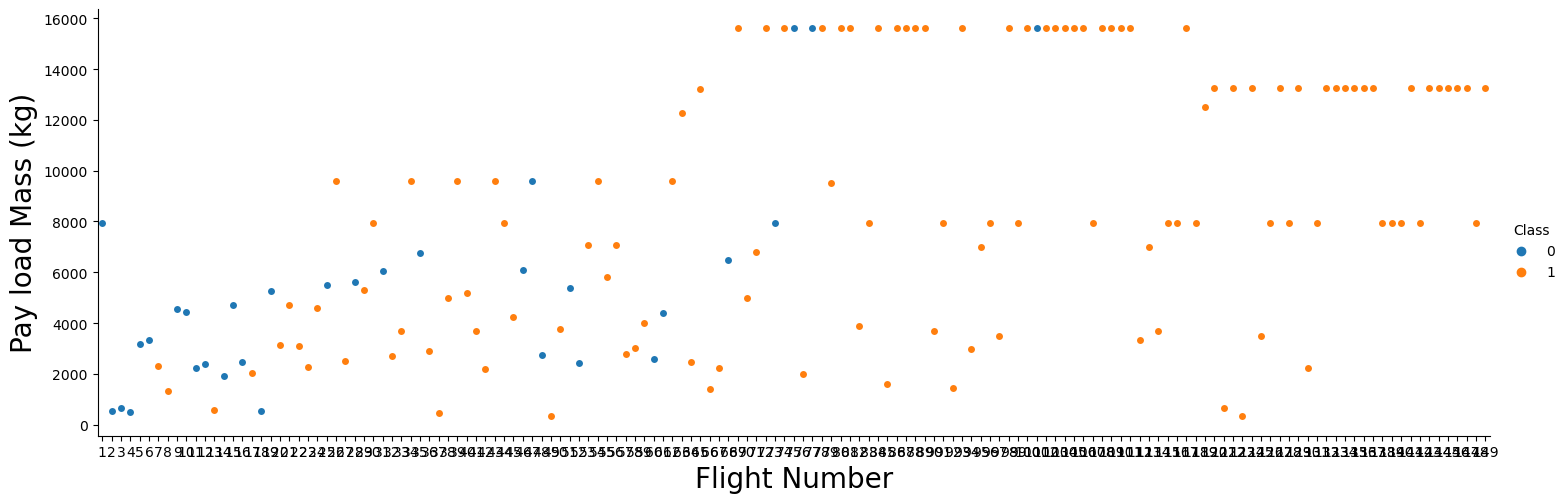

In [71]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 3, kind = 'swarm')
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

**Note:**
* Landing outcome tends to be successful as increase of `Flight Number`. As SpaceX launches more rockets, it tends to be better over time at resuing the first stage.
* There is not a clear relationship between `PayloadMass` and landing outcome from the plot above.

Let's plot landing success rate trend in the past years

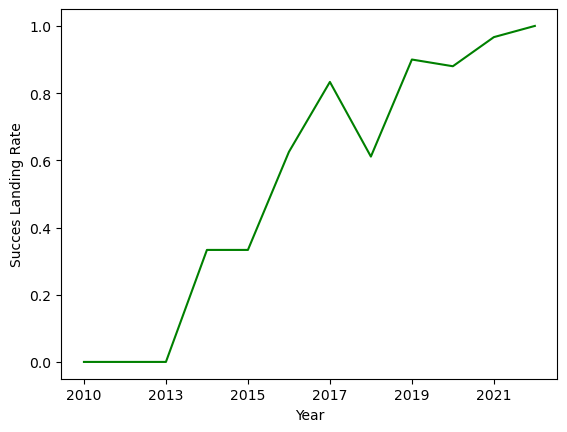

In [77]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year

# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
success_rate_by_year = df.groupby('Date')['Class'].mean()
success_rate_by_year_df = pd.DataFrame(success_rate_by_year).reset_index()
success_rate_by_year_df.plot(kind = 'line', x = 'Date', y = 'Class', color = 'green', legend = None)
plt.xlabel('Year')
plt.ylabel('Succes Landing Rate')
plt.show()

### 3.4.2. Landing outcome VS Launch Site and Payload Mass

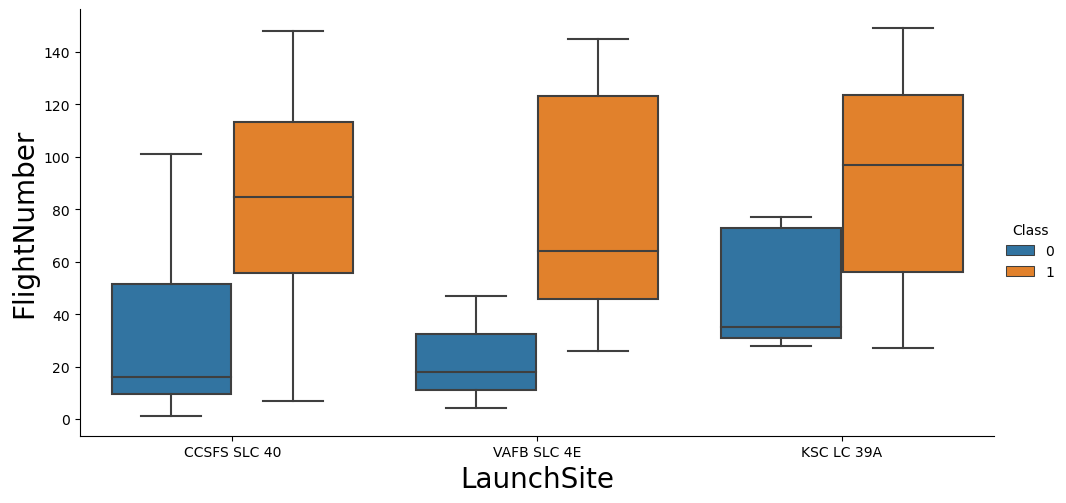

In [81]:
sns.catplot(y="FlightNumber", x="LaunchSite", hue="Class", aspect = 2, data=df, kind = 'box')
plt.xlabel("LaunchSite",fontsize=20)
plt.ylabel("FlightNumber",fontsize=20)
plt.show()

**Note:**
* For each launch site, landing outcome tends to be successful as increase of `Flight Number`, following the trend found in the previous section.

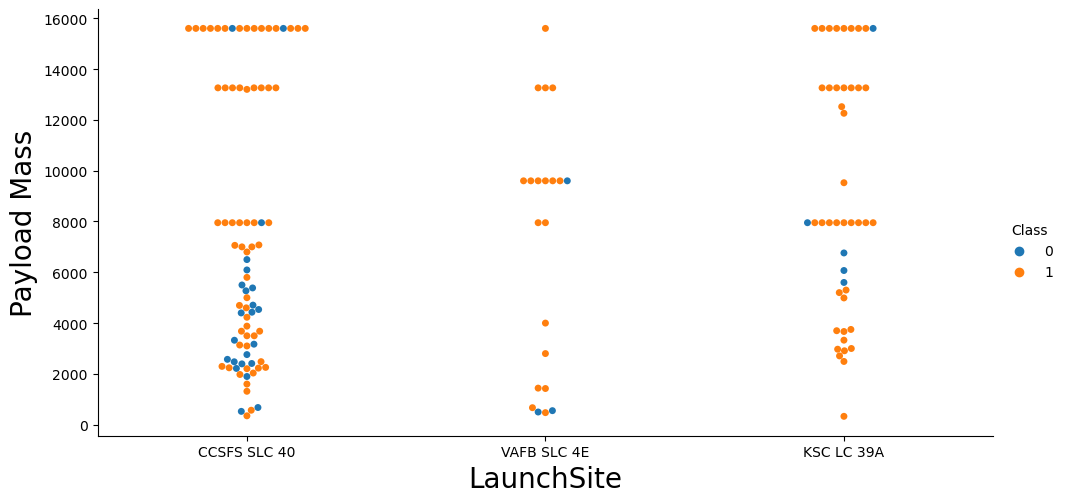

In [87]:
sns.catplot(x = 'LaunchSite', y = 'PayloadMass', data = df, aspect = 2, hue = 'Class', kind = 'swarm')
plt.xlabel('LaunchSite', fontsize = 20)
plt.ylabel('Payload Mass', fontsize = 20)
plt.show()

**Note:**
* From the plot above, each launch site shows different relationship between `PayloadMass` and landing outcome.
* Landing successful rate varies with `LaunchSite`.

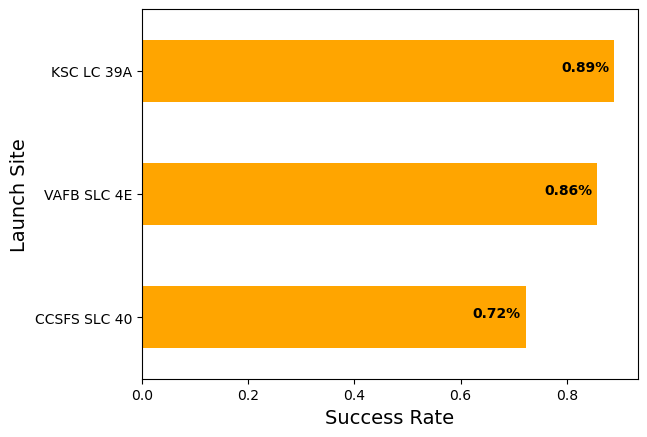

In [156]:
# calculate the landing success rate for each launch site
sr_launch_site = df.groupby('LaunchSite')['Class'].mean()
sr_launch_site_df = pd.DataFrame(sr_launch_site).reset_index()
sr_launch_site_df.sort_values(by = 'Class', ascending = True, axis = 0, inplace = True)

sr_launch_site_df.plot(kind = 'barh', x = 'LaunchSite', y = 'Class', color = 'orange', legend = None)
plt.ylabel('Launch Site', fontsize = 14)
plt.xlabel('Success Rate', fontsize = 14)

for index, value in enumerate(sr_launch_site_df['Class']):
    label = '{0:.2f}%'.format(value)
    plt.annotate(label, xy = (value-0.1, index), color = 'black', weight='bold')

plt.show()

### 3.4.3. Landing outcome VS Orbit

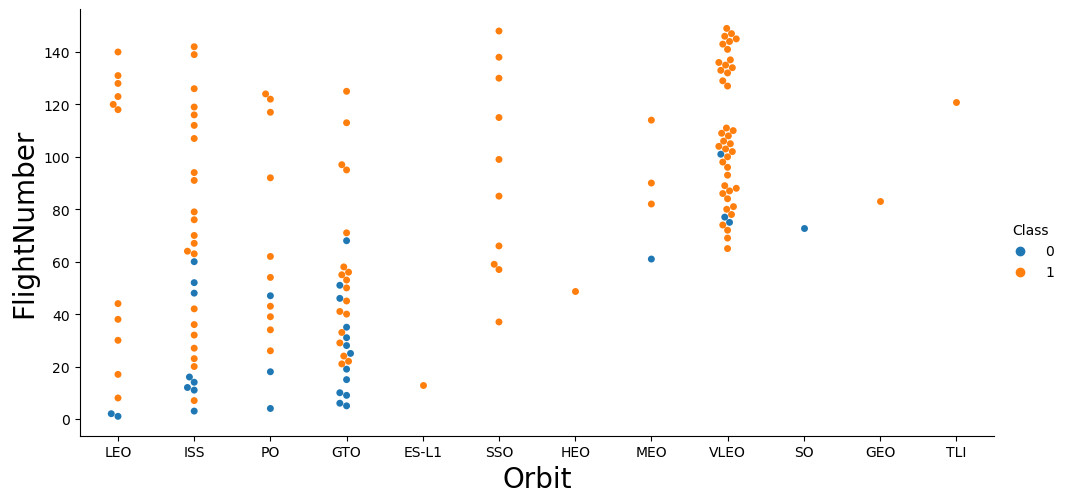

In [158]:
sns.catplot(y="FlightNumber", x="Orbit", hue="Class", aspect = 2, data=df, kind = 'swarm')
plt.xlabel("Orbit",fontsize=20)
plt.ylabel("FlightNumber",fontsize=20)
plt.show()

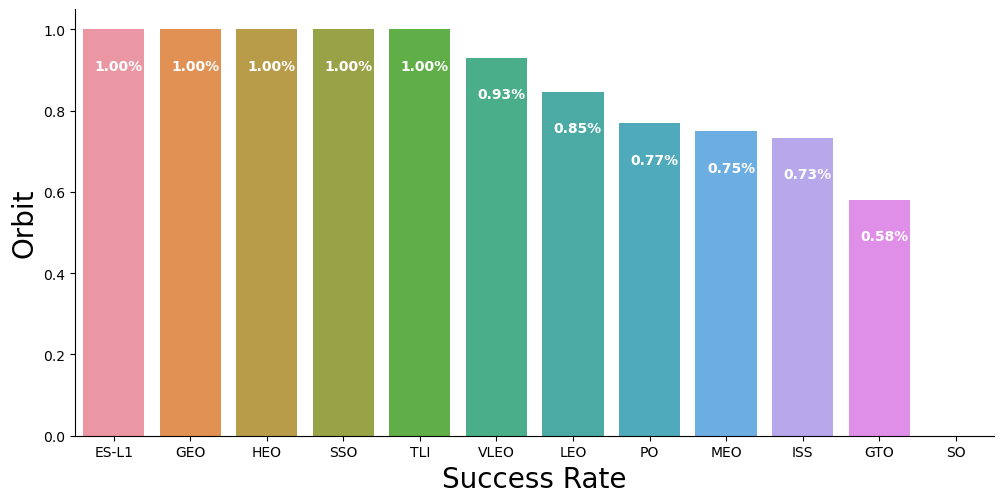

In [151]:
# calculate the landing success rate for each orbit
sr_orbit = df.groupby('Orbit')['Class'].mean()
sr_orbit_df = pd.DataFrame(sr_orbit).reset_index()
sr_orbit_df.sort_values(by = 'Class', ascending = False, axis = 0, inplace = True)

sns.catplot(x = 'Orbit', y = 'Class', data = sr_orbit_df, aspect = 2, kind = 'bar')
plt.ylabel('Orbit', fontsize = 20)
plt.xlabel('Success Rate', fontsize = 20)

for index, value in enumerate(sr_orbit_df['Class']):
    label = '{0:.2f}%'.format(value)
    plt.annotate(label, xy = (index-0.25, value-0.1), color = 'white', weight='bold')

plt.show()

C:\Users\wfei2\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 55.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


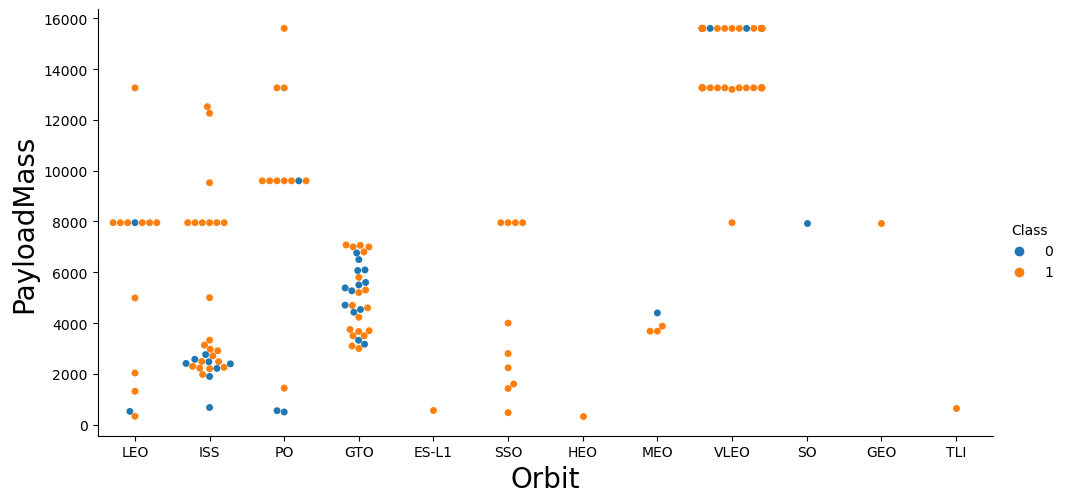

In [167]:
sns.catplot(data = df, x = 'Orbit', y = 'PayloadMass', hue = 'Class', aspect = 2, kind = 'swarm')
plt.xlabel('Orbit', fontsize = 20)
plt.ylabel('PayloadMass', fontsize = 20)
plt.show()

**Note:**
* `FlightNumber`, `PayloadMass`, `Orbit`, `LaunchSite` are potential useful features to predict landing outcome.
* Landing related features, such as `Flights`, `GridFins`, `Reused`, `Legs`, `LandingPad`, `Block`, `ReusedCount`, `Serial`, should be included as well.

## 3.5. Launch Site Interative Visualization

In [172]:
!pip install folium

     -------------------------------------- 102.3/102.3 kB 3.0 MB/s eta 0:00:00


In [173]:
import folium
from folium.plugins import MarkerCluster
from folium.plugins import MousePosition
from folium.features import DivIcon



==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.5.0




Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\wfei2\anaconda3

  added / updated specs:
    - folium


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.6.0               |     pyhd8ed1ab_0          27 KB  conda-forge
    ca-certificates-2023.5.7   |       h56e8100_0         145 KB  conda-forge
    certifi-2023.5.7           |     pyhd8ed1ab_0         149 KB  conda-forge
    folium-0.14.0              |     pyhd8ed1ab_0          71 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         392 KB

The following NEW packages will be INSTALLED:

  branca             conda-forge/noarch::branca-0.6.0-pyhd8ed1ab_0 
  folium             conda-forge/noarch::folium-0.14.0-pyhd8ed1ab_0 

The following packages will be UPDATED:

  ca-certificates    pkgs/main::ca-c

In [177]:
# Create a data frame with Latitude and Longitude for each launch site
launch_site_geo_dict = {'LaunchSite': ['CCAFS SLC 40', 'KSC LC 39A', 'VAFB SLC 4E'], 
                        'Lat': [28.563197, 28.573255, 34.632834], 
                        'Long': [-80.576820, -80.646895, -120.610745]}
launch_site_geo = pd.DataFrame(launch_site_geo_dict)
launch_site_geo

,LaunchSite,Lat,Long
0,CCAFS SLC 40,28.563197,-80.576820
1,KSC LC 39A,28.573255,-80.646895
2,VAFB SLC 4E,34.632834,-120.610745


In [180]:
# Mark out the loaction for each launch site

# Initial the map with Houston NASA position
nasa_coordinate = [29.559684888503615, -95.0830971930759]
site_map = folium.Map(location=nasa_coordinate, zoom_start=5)

# For each launch site, add a Circle object based on its coordinate (Lat, Long) values. In addition, add Launch site name as a popup label
launchsite_list = list(launch_site_geo['LaunchSite'])
launchsite_name_list = ['Cape Canaveral Space Force Station Space Launch Complex 40','Kennedy Space Center Launch Complex 39A','Vandenberg Space Force Base Space Launch 4E']
lat_list = list(launch_site_geo['Lat'])
long_list = list(launch_site_geo['Long'])

for site, name, lat, long in zip(launchsite_list, launchsite_name_list, lat_list, long_list):
    print(name, ' ', site,': ', lat, long)
    circle = folium.Circle([lat, long], radius=1000, color='#d35400', fill=True).add_child(folium.Popup(name))
    marker = folium.map.Marker([lat, long], icon=DivIcon(icon_size=(20,20),icon_anchor=(0,0), html='<div style="font-size: 20; color:#d35400;"><b>%s</b></div>' % site, ))
    site_map.add_child(circle)
    site_map.add_child(marker)

site_map

Cape Canaveral Space Force Station Space Launch Complex 40   CCAFS SLC 40 :  28.563197 -80.57682
Kennedy Space Center Launch Complex 39A   KSC LC 39A :  28.573255 -80.646895
Vandenberg Space Force Base Space Launch 4E   VAFB SLC 4E :  34.632834 -120.610745
